In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [2]:
products = pd.read_csv('./data/products_clean.csv')

In [3]:
products.head()

,name,brand,category,price,ingredients,no_reviews,hearts,size1,size2,url,final_size,price_per_ounce
0,Protini™ Polypeptide Moisturizer,Drunk Elephant,moisturizing-cream-oils-mists,68.0,"Dicaprylyl Carbonate, Glycerin, Cetearyl Alcoh...",3000,216935,1.69,0.0,https://www.sephora.com/product/protini-tm-pol...,1.69,40.236686
1,The Water Cream,Tatcha,moisturizing-cream-oils-mists,68.0,Saccharomyces/Camellia Sinensis Leaf/Cladosiph...,2000,197492,0.00,1.7,https://www.sephora.com/product/the-water-crea...,1.70,40.000000
2,Ultra Facial Cream,Kiehl's Since 1851,moisturizing-cream-oils-mists,32.0,"Aqua/Glycerin, Cyclohexasiloxane, Squalane, Bi...",943,87617,0.00,1.7,https://www.sephora.com/product/ultra-facial-c...,1.70,18.823529
3,CC+ Cream with SPF 50+,IT Cosmetics,moisturizing-cream-oils-mists,39.5,"Snail Secretion Filtrate, Phenyl Trimethicone,...",3000,225410,1.08,0.0,https://www.sephora.com/product/your-skin-but-...,1.08,36.574074
4,The Dewy Skin Cream,Tatcha,moisturizing-cream-oils-mists,68.0,Saccharomyces/Camellia Sinensis Leaf/Cladosiph...,1000,85005,0.00,1.7,https://www.sephora.com/product/the-dewy-skin-...,1.70,40.000000


## EDA Data Cleaning

In [4]:
products.describe()

,price,no_reviews,hearts,size1,size2,final_size,price_per_ounce
count,2452.000000,2452.000000,2452.000000,2451.000000,2451.000000,2452.000000,2452.000000
mean,54.709400,302.080750,15872.502039,1.519446,0.471559,2.255682,53.300950
std,49.421041,656.709405,29006.226469,1.829239,1.402495,1.902071,75.622704
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.060000,0.609002
25%,28.000000,20.000000,2201.250000,0.000000,0.000000,1.000000,9.955554
50%,41.000000,90.000000,5655.500000,1.000000,0.000000,1.700000,28.894444
75%,66.000000,319.000000,16141.750000,1.700000,0.000000,3.300000,66.587990
max,495.000000,11000.000000,315697.000000,10.100000,12.850000,12.850000,940.483795


In [5]:
#checking out the maximum price of $495 it is actually correct
#https://www.sephora.com/product/neuropeptide-facial-conformer-contouring-treatment-P211332?skuId=2125763&keyword=Neuropeptide%20Smoothing%20Facial%20Conformer
products[products.price == 495]

,name,brand,category,price,ingredients,no_reviews,hearts,size1,size2,url,final_size,price_per_ounce
1644,Neuropeptide Smoothing Facial Conformer,Perricone MD,facial-treatments,495.0,"C1215 Alkyl Benzoate, Butylene Glycol, Dimethy...",27,1635,0.0,2.0,https://www.sephora.com/product/neuropeptide-f...,2.0,247.5


In [6]:
#checking for annomalies in price_per_ounce
products[products['price_per_ounce'] > 500]

,name,brand,category,price,ingredients,no_reviews,hearts,size1,size2,url,final_size,price_per_ounce
1538,R45 The Reversal 3-Phase Retinol Booster System,BeautyBio,facial-treatments,150.0,"Glycerin, Butylene Glycol, Cyclopentasiloxane,...",20,2089,0.17,0.0,https://www.sephora.com/product/r45-reversal-3...,0.170000,882.352941
1618,The Beauty Boost R45 The Reversal 3-Phase Reti...,BeautyBio,facial-treatments,150.0,"Glycerin, Butylene Glycol, Cyclopentasiloxane,...",3,511,0.17,0.0,https://www.sephora.com/product/the-beauty-boo...,0.170000,882.352941
1659,TIME RESPONSE Skin Reserve Serum,AMOREPACIFIC,facial-treatments,280.0,"Camellia Sinensis Leaf Butylene Glycol, Glycer...",0,349,0.50,0.0,https://www.sephora.com/product/time-response-...,0.500000,560.000000
1822,The Lifting Eye Serum,La Mer,eye-treatment-dark-circle-treatment,260.0,"Declustered Water ()\Aqua\Eau DeStructuree (),...",9,5449,0.50,0.0,https://www.sephora.com/product/the-lifting-ey...,0.500000,520.000000
1833,TIME RESPONSE Eye Reserve Crème,AMOREPACIFIC,eye-treatment-dark-circle-treatment,260.0,"Camellia Sinensis Leaf Butylene Glycol, Glycer...",13,2505,0.50,0.0,https://www.sephora.com/product/time-response-...,0.500000,520.000000
1870,Elixir Vitae Eye Serum,Tata Harper,eye-treatment-dark-circle-treatment,295.0,**Clinicalgrade essential oils blend.,1,786,0.50,0.0,https://www.sephora.com/product/elixir-vitae-e...,0.500000,590.000000
2338,Le Rouge Perfecto Beautifying Lip Balm,Givenchy,lip-treatments,37.0,Pepperslim and Coolact: Create a slight puffin...,216,35989,0.07,0.0,https://www.sephora.com/product/le-rouge-perfe...,0.070000,528.571429
2339,GloPRO® Microneedling Facial Regeneration Tool...,BeautyBio,lip-treatments,249.0,"Hydrogenated Polyisobutene, Ethylene/Propylene...",12,4246,0.00,0.0,https://www.sephora.com/product/give-bigger-ki...,0.264757,940.483795
2363,Sugar Lip Masterpiece Gift Set,Fresh,lip-treatments,178.0,"Sucrose, Simmondsia Chinensis (Jojoba) Seed Oi...",1,1705,0.00,0.0,https://www.sephora.com/product/sugar-lip-mast...,0.264757,672.313717
2366,Clutch Sized Soleil Neige Lip Balm,TOM FORD,lip-treatments,36.0,"Isononyl Isononanoate, C1030 Cholesterol/Lanos...",6,2845,0.07,0.0,https://www.sephora.com/product/clutch-sized-s...,0.070000,514.285714


In [7]:
#all the lip-treatments and eye-treatment seem appropriate. The index 1538 and 1618, the size should actually be
# 3 times that
products.loc[1538, 'final_size'] = 0.51
products.loc[1538, 'price_per_ounce'] = 294.18
products.loc[1618, 'final_size'] = 0.51
products.loc[1618, 'price_per_ounce'] = 294.18

In [8]:
#this is a tool not a liquid product and thus I will drop it
products.drop([2339], inplace = True)

In [9]:
products.describe()

,price,no_reviews,hearts,size1,size2,final_size,price_per_ounce
count,2451.000000,2451.000000,2451.000000,2450.000000,2450.000000,2451.000000,2451.000000
mean,54.630131,302.199102,15877.245614,1.520066,0.471751,2.256772,52.459037
std,49.274965,656.817258,29011.194227,1.829355,1.402749,1.901754,69.895908
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.060000,0.609002
25%,28.000000,20.000000,2200.500000,0.000000,0.000000,1.000000,9.921108
50%,41.000000,90.000000,5663.000000,1.000000,0.000000,1.700000,28.888889
75%,66.000000,319.000000,16152.500000,1.700000,0.000000,3.300000,66.561765
max,495.000000,11000.000000,315697.000000,10.100000,12.850000,12.850000,672.313717


## Price EDA

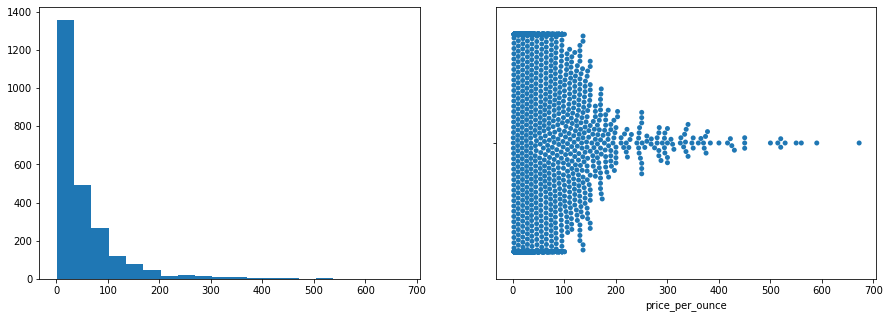

In [10]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

ax[0].hist(products['price_per_ounce'], bins = 20)
sns.swarmplot(products['price_per_ounce'], ax = ax[1]);

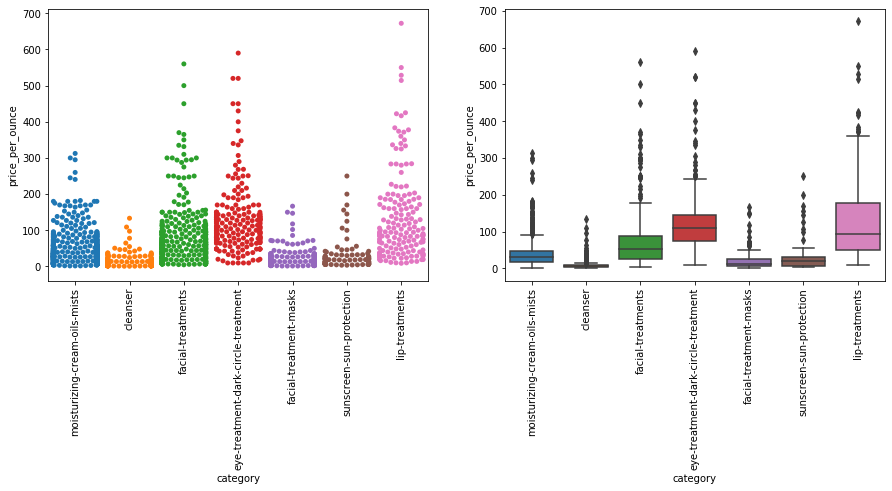

In [11]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
sns.swarmplot(x="category", y="price_per_ounce", data=products, ax = ax[0])
#plt.xticks(rotation = 90);
sns.boxplot(x='category', y = 'price_per_ounce', data = products, ax = ax[1])

#https://stackoverflow.com/questions/31186019/rotate-tick-labels-in-subplot-pyplot-matplotlib-gridspec/52461208
for tick in ax[0].get_xticklabels():
    tick.set_rotation(90)

for tick in ax[1].get_xticklabels():
    tick.set_rotation(90)

[]

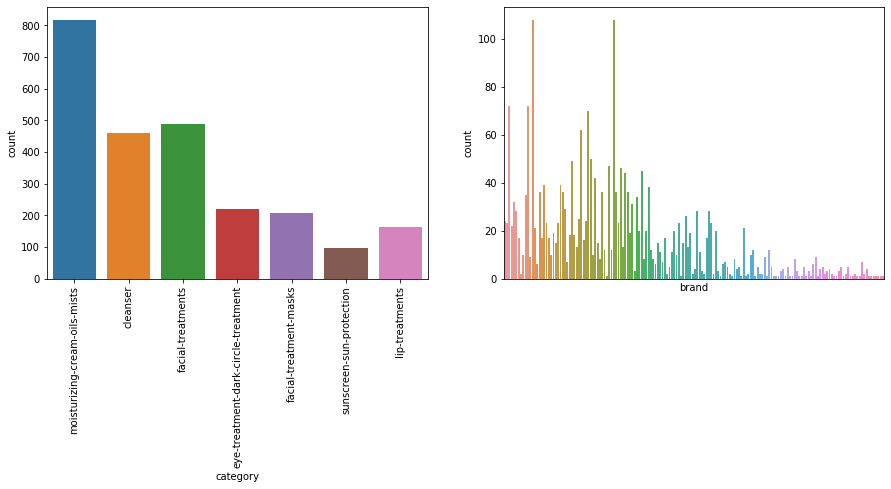

In [12]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
sns.countplot(products['category'], ax = ax[0])
#plt.xticks(rotation = 90);
sns.countplot(products['brand'], ax = ax[1])

#https://stackoverflow.com/questions/31186019/rotate-tick-labels-in-subplot-pyplot-matplotlib-gridspec/52461208
for tick in ax[0].get_xticklabels():
    tick.set_rotation(90)

# for tick in ax[1].get_xticklabels():
#     tick.set_rotation(90)
ax[1].set_xticks([])    

In [13]:
train_cat = products[['brand', 'category']]

pvalues_fin = pd.DataFrame(columns = ['features', 'pvalue'])


pvalues_fin['features'] = train_cat.columns

pvals=[]
for col in train_cat.columns:
    
    samples = list([])
    for cat in products[col].unique():
        s = list(products[products[col] == cat]['price_per_ounce'])
        samples.append(s)
    pval=stats.f_oneway(*samples)[1] 
    
    pvals.append(pval)
pvalues_fin['pvalue'] = pvals

#picking the lowest 20 pvalue scores to fit into our model
cat_model = pvalues_fin.sort_values(by='pvalue', ascending = True).iloc[:20]

In [14]:
pvalues_fin

,features,pvalue
0,brand,2.415214e-110
1,category,3.116707e-195


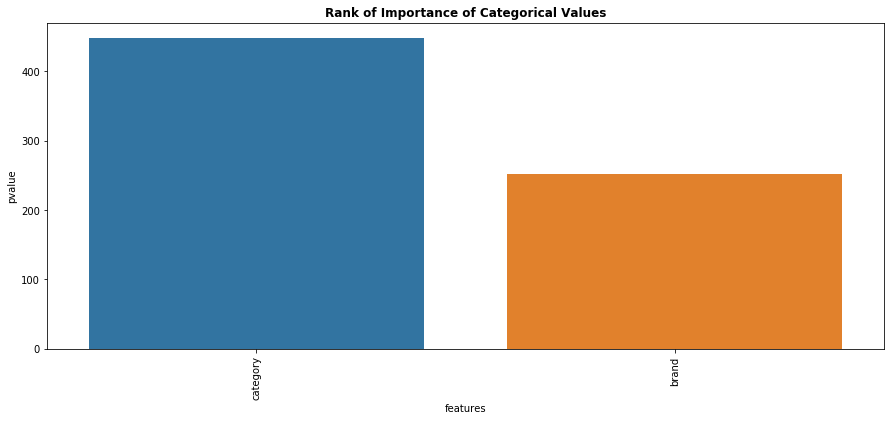

In [15]:
pvalues_fin['pvalue'] = np.log(1/pvalues_fin['pvalue'])

fig, ax = plt.subplots(figsize = (15,6))
sns.barplot(data=pvalues_fin.sort_values(by='pvalue', ascending=False), x = 'features', y='pvalue', ax=ax) 
plt.xticks(rotation=90)
plt.title('Rank of Importance of Categorical Values', weight = 'bold');

## GroupBy

In [16]:
products.groupby(['category']).mean()

,price,no_reviews,hearts,size1,size2,final_size,price_per_ounce
category,,,,,,,
cleanser,32.270783,343.089130,14579.632609,3.153957,1.151022,4.926095,9.084081
eye-treatment-dark-circle-treatment,64.324110,224.333333,12641.442922,0.423670,0.015982,0.518162,127.684457
facial-treatment-masks,42.316039,258.004831,15853.115942,1.365990,0.289275,2.447429,20.660820
facial-treatments,75.154928,275.911704,16768.264887,0.919030,0.213018,1.323477,69.822527
lip-treatments,24.067073,432.189024,24239.262195,0.218274,0.001280,0.264757,135.204411
moisturizing-cream-oils-mists,62.993325,309.111247,15752.101467,1.496806,0.482632,2.067301,40.386867
sunscreen-sun-protection,43.036458,231.583333,11789.833333,1.984062,0.673750,2.773370,30.679014


In [17]:
products[(products['price_per_ounce'] >= 200)].groupby(['brand', 'category']).mean()

price  \
brand                     category                                          
AMOREPACIFIC              eye-treatment-dark-circle-treatment  260.000000   
                          facial-treatments                    265.000000   
                          moisturizing-cream-oils-mists        150.000000   
Armani Beauty             lip-treatments                        34.000000   
BeautyBio                 facial-treatments                    128.333333   
Bobbi Brown               lip-treatments                        34.000000   
CLINIQUE                  lip-treatments                        31.000000   
Clarins                   lip-treatments                        26.000000   
Dior                      eye-treatment-dark-circle-treatment  105.000000   
                          lip-treatments                        34.000000   
Dr. Barbara Sturm         eye-treatment-dark-circle-treatment  140.000000   
                          facial-treatments                    281.111111   
Dr. Dennis Gross Skincare eye-treatment-dark-circle-treatment  159.000000   
Edible Beauty             eye-treatment-dark-circle-treatment   65.000000   
FOREO                     eye-treatment-dark-circle-treatment  139.000000   
Fresh                     eye-treatment-dark-circle-treatment  148.000000   
                          facial-treatments                    245.000000   
                          lip-treatments                       178.000000   
Givenchy                  lip-treatments                        37.000000   
Glow Recipe               lip-treatments                        22.000000   
Grande Cosmetics          lip-treatments                        20.000000   
Gucci                     lip-treatments                        42.000000   
Guerlain                  eye-treatment-dark-circle-treatment  200.000000   
                          facial-treatments                    397.500000   
                          lip-treatments                        37.500000   
ILIA                      lip-treatments                        28.000000   
IT Cosmetics              lip-treatments                        25.000000   
Kate Somerville           eye-treatment-dark-circle-treatment  103.333333   
LANCER Skincare           facial-treatments                    275.000000   
La Mer                    eye-treatment-dark-circle-treatment  236.666667   
                          facial-treatments                    316.666667   
                          lip-treatments                        70.000000   
                          moisturizing-cream-oils-mists        187.500000   
NARS                      lip-treatments                        28.000000   
NUDESTIX                  lip-treatments                        25.000000   
Natasha Denona            lip-treatments                        26.000000   
Omorovicza                eye-treatment-dark-circle-treatment  145.000000   
PAT McGRATH LABS          lip-treatments                        40.000000   
PMD                       lip-treatments                        99.000000   
Perricone MD              eye-treatment-dark-circle-treatment  131.000000   
                          facial-treatments                    495.000000   
                          lip-treatments                        30.000000   
Peter Thomas Roth         sunscreen-sun-protection              30.000000   
SK-II                     eye-treatment-dark-circle-treatment  167.000000   
                          facial-treatments                    325.000000   
                          moisturizing-cream-oils-mists        385.000000   
Shiseido                  eye-treatment-dark-circle-treatment  153.000000   
                          facial-treatments                    225.000000   
                          lip-treatments                        26.000000   
Sulwhasoo                 eye-treatment-dark-circle-treatment  180.000000   
Supergoop!                sunscreen-sun-protection              

In [18]:
#looking in to some high priced moisturizers and facial treatments
#index 222 = Colored Clay CC Undereye Corrector, tarte
#index 2206 = Invincible Setting Powder SPF 45, Supergoop
products.drop([222, 2206], inplace = True)

In [19]:
#while looking closer at the expensive products I noticed that this Boosted Contouring Serum from Tata Harper
#the ingredience are not loaded properly
products[products.name == "Boosted Contouring Serum"]

,name,brand,category,price,ingredients,no_reviews,hearts,size1,size2,url,final_size,price_per_ounce
813,Boosted Contouring Serum,Tata Harper,moisturizing-cream-oils-mists,295.0,WaterGlycerinMontmorilloniteDimethiconeCyclohe...,1,285,1.0,0.0,https://www.sephora.com/product/boosted-contou...,1.0,295.0


In [20]:
#they didn't post their entire ingredients list on sephora, so I went to their own site and grabbed the list from there
products[products.name == "Boosted Contouring Serum"]['ingredients']

813    WaterGlycerinMontmorilloniteDimethiconeCyclohe...
Name: ingredients, dtype: object

In [21]:
products.loc[813, 'ingredients'] = "Hordeum Vulgare Leaf Juice*, Glycerin, Caprylic / Capric Triglyceride, Rosa Damascena Flower Water*, Propanediol, Cocos Nucifera (Coconut) Fruit Extract, Silybum Marianum (Milk Thistle) Ethyl Ester, Arachidyl Alcohol, Glyceryl Stearate SE, Helianthus Annuus (Sunflower) Seed Wax, Cetearyl Olivate, Cetyl Alcohol, Dipalmitoyl Hydroxyproline, Glyceryl Undecylenate, Algae Extract, Narcissus Tazetta (Daffodil) Bulb Extract*, Hyaluronic Acid, Citrus Aurantium Dulcis (Orange) Flower Extract, Punica Granatum Extract, Carthamus Tinctorius (Safflower) Oleosomes*, Leontopodium Alpinum Callus Culture Extract, Sambucus Nigra Fruit Extract, Calcium Ketogluconate, Phoenix Dactylifera (Date) Seed Extract, Sodium Hyaluronate, Voandzeia Subterranea Seed Extract, Pistacia Lentiscus Gum, Centella Asiatica Extract, Algae Oligosaccharides, Alaria Esculenta Extract, Menyanthes Trifoliata Leaf Extract, Rosmarinyl Glucoside, Lavandula Stoechas (Spanish Lavender) Extract, Caffeyl Glucoside, Gallyl Glucoside, Sorbitan Olivate, Ribose, Rosa Rubiginosa Seed Oil*, Saccharide Isomerate, Arachidyl Glucoside, Salix Alba (Willow) Bark Extract, Glyceryl Caprylate, Helianthus Annuus (Sunflower) Seed Oil, Opuntia Ficus Indica*, Santalum Spicatum (Sandalwood) Seed Oil, Camellia Oleifera Seed Oil*, Camellia Sinensis (Green Tea) Seed Oil*, Euterpe Oleracea (Acai) Fruit Oil*, Plukenetia Volubilis Seed Oil*, Arnica Montana (Arnica) Extract*, Borago Officinalis (Borage) Leaf Extract*, Calendula Officinalis (Calendula) Flower Extract*, Medicago Sativa (Alfalfa) Extract*, Spiraea Ulmaria (Meadowsweet) Extract*, Tocopherol, Olea Europaea (Olive) Oil*, Aroma**, Behenyl Alcohol, Maltodextrin, Xanthan Gum, p-Anisic Acid, Acacia Senegal Gum, Leuconostoc/Radish Root Ferment Filtrate, Citric Acid, Sodium Citrate, Benzyl Alcohol, Benzyl Benzoate, Citral, Citronellol, Eugenol, Geraniol, Limonene, Linalool"



## Unique Ingredients

In [32]:
all_ingredients = []

for i in products.index:
    list_ingredients = products.ingredients[i]. split(',')
    for j in list_ingredients:     
        all_ingredients.append(j.strip())
print(len(all_ingredients))
print(len(set(all_ingredients)))

unique_ingredients = set(all_ingredients)

72918
8730
